In [ ]:
library(pacman)
p_load(lubridate, AUC, tidyverse,magrittr, dplyr, tidyr,rlist,dummy , e1071, ROSE , rotationForest, xgboost, Boruta, varSelRF, caret)


: 

In [ ]:
p_load(caret)

p_load(FNN)

p_load(randomForest)

options(repr.matrix.max.cols=1000, repr.matrix.max.rows=1000)

: 

In [ ]:
p_load(ranger)

: 

# Building basetable

In [ ]:
table = (read.csv("Data//Hilly_races_final.csv", sep = ";"))
head(table)

Pos,Rider,Team,Time,Rider_ID,Rider_Country,Team_ID,Year,Stage,UCI,ID,Stage.Type,Race,ACCELERATION,ATTACK,Birthday,COBBLES,CONSTANT,DOWNHILL,ENDURANCE,FLAT,Family.Name,Given.Name,HILL,MOUNTAIN,Name,PROLOGUE,Popularity,RECUP,RESISTANCE,Region,SPRINT,Size,TT,Weight,fitness_i_handicap,fkIDcyclist_state,fkIDinjury,fkIDrace,fkIDstaff_physician,fkIDstaff_trainer,fkIDstate_roster,fkIDtga_skin,fkIDtraining_camp,fkIDtype_rider,gene_b_inshortlist,gene_b_nominated,gene_b_selected_in_roster,gene_b_will_retire,gene_f_popularity_max,gene_i_champion_bit,gene_i_date_last_breakaway,gene_i_date_last_punchers,gene_i_day_progression,gene_i_dossard,gene_i_year_progression,gene_ilist_fkIDfavorite_races,gene_sz_firstlastname,gene_sz_soundname,limit_i_acceleration,limit_i_baroudeur,limit_i_cobble,limit_i_downhilling,limit_i_endurance,limit_i_hill,limit_i_mountain,limit_i_plain,limit_i_prologue,limit_i_recuperation,limit_i_resistance,limit_i_sprint,limit_i_timetrial,prerace_i_cyclist,race_b_withdrawal,value_i_potentiel,value_i_rank_voted
1,rubiano miguel angel,Androni Giocattoli - Venezuela,05:38:30,885,COL,23,2012,6,NA,5134,Hilly,Giro,68,68,19841003,53,,68,67,64,Rubiano Chavez,Miguel Angel,71,72,M.Rubiano Chavez,65,26,66,69,1101,64,170,62,58,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,,M.Rubiano Chavez,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0
2,malori adriano,Lampre-ISD,+ 01:10,791,ITA,11,2012,6,NA,1958,Hilly,Giro,63,68,19880128,56,,63,64,70,Malori,Adriano,64,64,A.Malori,74,18,66,67,208,60,182,74,68,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,16,0,0,0,0,0,,A.Malori,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0
3,golas michal,Omega Pharma - Quick Step,+ 01:10,926,POL,13,2012,6,NA,976,Hilly,Giro,70,63,19840429,59,,63,65,69,Go?a?,Micha?,65,61,M.Go?a?,62,23,63,65,3001,70,180,60,65,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,359|25|175,M.Go?a?,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0
4,dyachenko alexsandr,Astana Pro Team,+ 01:10,478,KAZ,25,2012,6,NA,499,Hilly,Giro,63,62,19831017,54,,64,66,64,Dyachenko,Alexandr,69,71,A.Dyachenko,65,22,66,67,1301,58,175,67,63,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,,A.Dyachenko,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0
5,benedetti cesare,Team NetApp,+ 01:10,3224,POL,57,2012,6,NA,2281,Hilly,Giro,63,64,19870803,57,,64,64,66,Benedetti,Cesare,64,63,C.Benedetti,59,5,61,63,206,60,170,61,63,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,,C.Benedetti,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0
6,impey daryl,Orica - GreenEDGE,+ 01:51,706,RSA,6,2012,6,NA,306,Hilly,Giro,74,62,19841206,53,,66,67,70,Impey,Daryl,70,64,D.Impey,69,38,69,67,3601,72,183,67,70,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,16,0,0,0,0,0,,D.Impey,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0


: 

In [ ]:
table_train = table[table$Year<=2017,]

: 

In [ ]:
table_val = table[(table$Year>2017)&(table$Year<=2019) ,]

: 

In [ ]:
table_test = table[table$Year>2019,]

: 

In [ ]:
table_train2 = table[table$Year<=2019,]

In [ ]:
basetable_train = table_train %>% group_by(Race, Year,Team) %>% summarise(flat_mean = round(mean(FLAT))
                                             , mountain_mean = round(mean(MOUNTAIN))
                                            , downhill_mean = round(mean(DOWNHILL))
                                            ,cobbles_mean = round(mean(COBBLES))
                                            ,tt_mean = round(mean(TT)),
                                            ,prologue_mean = round(mean(PROLOGUE))
                                            ,sprint_mean = round(mean(SPRINT))
                                            ,acceleration_mean = round(mean(ACCELERATION))
                                            ,endurance_mean = round(mean(ENDURANCE))
                                            ,resistance_mean = round(mean(RESISTANCE))
                                            ,recup_mean = round(mean(RECUP))
                                            ,hill_mean = round(mean(HILL))
                                            ,attack_mean = round(mean(ATTACK))
                                            
                                            ,flat_max = round(max(FLAT))
                                            ,mountain_max = round(max(MOUNTAIN))
                                            ,downhill_max = round(max(DOWNHILL))
                                            ,cobbles_max = round(max(COBBLES))
                                            ,tt_max = round(max(TT)),
                                            ,prologue_max = round(max(PROLOGUE))
                                            ,sprint_max = round(max(SPRINT))
                                            ,acceleration_max = round(max(ACCELERATION))
                                            ,endurance_max = round(max(ENDURANCE))
                                            ,resistance_max = round(max(RESISTANCE))
                                            ,recup_max = round(max(RECUP))
                                            ,hill_max = round(max(HILL))
                                            ,attack_max = round(max(ATTACK))
                                            
                                            ,flat_min = round(min(FLAT))
                                            ,mountain_min = round(min(MOUNTAIN))
                                            ,downhill_min = round(min(DOWNHILL))
                                            ,cobbles_min = round(min(COBBLES))
                                            ,tt_min = round(min(TT)),
                                            ,prologue_min = round(min(PROLOGUE))
                                            ,sprint_min = round(min(SPRINT))
                                            ,acceleration_min = round(min(ACCELERATION))
                                            ,endurance_min = round(min(ENDURANCE))
                                            ,resistance_min = round(min(RESISTANCE))
                                            ,recup_min = round(min(RECUP))
                                            ,hill_min = round(min(HILL))
                                            ,attack_min = round(min(ATTACK))
                                    
                                            ,best_position = min(Pos))

`summarise()` has grouped output by 'Race', 'Year'. You can override using the `.groups` argument.


: 

In [ ]:
basetable_val = table_val %>% group_by(Race, Year,Team) %>% summarise(flat_mean = round(mean(FLAT))
                                             , mountain_mean = round(mean(MOUNTAIN))
                                            , downhill_mean = round(mean(DOWNHILL))
                                            ,cobbles_mean = round(mean(COBBLES))
                                            ,tt_mean = round(mean(TT)),
                                            ,prologue_mean = round(mean(PROLOGUE))
                                            ,sprint_mean = round(mean(SPRINT))
                                            ,acceleration_mean = round(mean(ACCELERATION))
                                            ,endurance_mean = round(mean(ENDURANCE))
                                            ,resistance_mean = round(mean(RESISTANCE))
                                            ,recup_mean = round(mean(RECUP))
                                            ,hill_mean = round(mean(HILL))
                                            ,attack_mean = round(mean(ATTACK))
                                            
                                            ,flat_max = round(max(FLAT))
                                            ,mountain_max = round(max(MOUNTAIN))
                                            ,downhill_max = round(max(DOWNHILL))
                                            ,cobbles_max = round(max(COBBLES))
                                            ,tt_max = round(max(TT)),
                                            ,prologue_max = round(max(PROLOGUE))
                                            ,sprint_max = round(max(SPRINT))
                                            ,acceleration_max = round(max(ACCELERATION))
                                            ,endurance_max = round(max(ENDURANCE))
                                            ,resistance_max = round(max(RESISTANCE))
                                            ,recup_max = round(max(RECUP))
                                            ,hill_max = round(max(HILL))
                                            ,attack_max = round(max(ATTACK))
                                            
                                            ,flat_min = round(min(FLAT))
                                            ,mountain_min = round(min(MOUNTAIN))
                                            ,downhill_min = round(min(DOWNHILL))
                                            ,cobbles_min = round(min(COBBLES))
                                            ,tt_min = round(min(TT)),
                                            ,prologue_min = round(min(PROLOGUE))
                                            ,sprint_min = round(min(SPRINT))
                                            ,acceleration_min = round(min(ACCELERATION))
                                            ,endurance_min = round(min(ENDURANCE))
                                            ,resistance_min = round(min(RESISTANCE))
                                            ,recup_min = round(min(RECUP))
                                            ,hill_min = round(min(HILL))
                                            ,attack_min = round(min(ATTACK))
                                    
                                            ,best_position = min(Pos))

`summarise()` has grouped output by 'Race', 'Year'. You can override using the `.groups` argument.


: 

In [ ]:
basetable_test = table_test %>% group_by(Race, Year,Team) %>% summarise(flat_mean = round(mean(FLAT))
                                             , mountain_mean = round(mean(MOUNTAIN))
                                            , downhill_mean = round(mean(DOWNHILL))
                                            ,cobbles_mean = round(mean(COBBLES))
                                            ,tt_mean = round(mean(TT)),
                                            ,prologue_mean = round(mean(PROLOGUE))
                                            ,sprint_mean = round(mean(SPRINT))
                                            ,acceleration_mean = round(mean(ACCELERATION))
                                            ,endurance_mean = round(mean(ENDURANCE))
                                            ,resistance_mean = round(mean(RESISTANCE))
                                            ,recup_mean = round(mean(RECUP))
                                            ,hill_mean = round(mean(HILL))
                                            ,attack_mean = round(mean(ATTACK))
                                            
                                            ,flat_max = round(max(FLAT))
                                            ,mountain_max = round(max(MOUNTAIN))
                                            ,downhill_max = round(max(DOWNHILL))
                                            ,cobbles_max = round(max(COBBLES))
                                            ,tt_max = round(max(TT)),
                                            ,prologue_max = round(max(PROLOGUE))
                                            ,sprint_max = round(max(SPRINT))
                                            ,acceleration_max = round(max(ACCELERATION))
                                            ,endurance_max = round(max(ENDURANCE))
                                            ,resistance_max = round(max(RESISTANCE))
                                            ,recup_max = round(max(RECUP))
                                            ,hill_max = round(max(HILL))
                                            ,attack_max = round(max(ATTACK))
                                            
                                            ,flat_min = round(min(FLAT))
                                            ,mountain_min = round(min(MOUNTAIN))
                                            ,downhill_min = round(min(DOWNHILL))
                                            ,cobbles_min = round(min(COBBLES))
                                            ,tt_min = round(min(TT)),
                                            ,prologue_min = round(min(PROLOGUE))
                                            ,sprint_min = round(min(SPRINT))
                                            ,acceleration_min = round(min(ACCELERATION))
                                            ,endurance_min = round(min(ENDURANCE))
                                            ,resistance_min = round(min(RESISTANCE))
                                            ,recup_min = round(min(RECUP))
                                            ,hill_min = round(min(HILL))
                                            ,attack_min = round(min(ATTACK))
                                    
                                            ,best_position = min(Pos))

`summarise()` has grouped output by 'Race', 'Year'. You can override using the `.groups` argument.


: 

In [ ]:
basetable = table_train2 %>% group_by(Race, Year,Team) %>% summarise(flat_mean = round(mean(FLAT))
                                                                     , mountain_mean = round(mean(MOUNTAIN))
                                                                     , downhill_mean = round(mean(DOWNHILL))
                                                                     ,cobbles_mean = round(mean(COBBLES))
                                                                     ,tt_mean = round(mean(TT)),
                                                                     ,prologue_mean = round(mean(PROLOGUE))
                                                                     ,sprint_mean = round(mean(SPRINT))
                                                                     ,acceleration_mean = round(mean(ACCELERATION))
                                                                     ,endurance_mean = round(mean(ENDURANCE))
                                                                     ,resistance_mean = round(mean(RESISTANCE))
                                                                     ,recup_mean = round(mean(RECUP))
                                                                     ,hill_mean = round(mean(HILL))
                                                                     ,attack_mean = round(mean(ATTACK))
                                                                     
                                                                     ,flat_max = round(max(FLAT))
                                                                     ,mountain_max = round(max(MOUNTAIN))
                                                                     ,downhill_max = round(max(DOWNHILL))
                                                                     ,cobbles_max = round(max(COBBLES))
                                                                     ,tt_max = round(max(TT)),
                                                                     ,prologue_max = round(max(PROLOGUE))
                                                                     ,sprint_max = round(max(SPRINT))
                                                                     ,acceleration_max = round(max(ACCELERATION))
                                                                     ,endurance_max = round(max(ENDURANCE))
                                                                     ,resistance_max = round(max(RESISTANCE))
                                                                     ,recup_max = round(max(RECUP))
                                                                     ,hill_max = round(max(HILL))
                                                                     ,attack_max = round(max(ATTACK))
                                                                     
                                                                     ,flat_min = round(min(FLAT))
                                                                     ,mountain_min = round(min(MOUNTAIN))
                                                                     ,downhill_min = round(min(DOWNHILL))
                                                                     ,cobbles_min = round(min(COBBLES))
                                                                     ,tt_min = round(min(TT)),
                                                                     ,prologue_min = round(min(PROLOGUE))
                                                                     ,sprint_min = round(min(SPRINT))
                                                                     ,acceleration_min = round(min(ACCELERATION))
                                                                     ,endurance_min = round(min(ENDURANCE))
                                                                     ,resistance_min = round(min(RESISTANCE))
                                                                     ,recup_min = round(min(RECUP))
                                                                     ,hill_min = round(min(HILL))
                                                                     ,attack_min = round(min(ATTACK))
                                                                     
                                                                     ,best_position = min(Pos))


: 

In [ ]:
basetable_train = (basetable_train)%>% drop_na()
basetable_val = (basetable_val)%>% drop_na()
basetable_test = (basetable_test)%>% drop_na()
basetable = (basetable)%>% drop_na()

: 

In [ ]:
basetable_train$Top10 = as.factor(ifelse(basetable_train$best_position <=10, 1,0))
basetable_train$Top5 = as.factor(ifelse(basetable_train$best_position <=5, 1,0))
basetable_train$Top4 = as.factor(ifelse(basetable_train$best_position <=4, 1,0))
basetable_train$Top3 = as.factor(ifelse(basetable_train$best_position <=3, 1,0))
basetable_train$Top2 = as.factor(ifelse(basetable_train$best_position <=2, 1,0))

: 

In [ ]:
table(basetable_train$Top10)


  0   1 
 58 225 

: 

In [ ]:
basetable_train$minutes_from_top = NULL
basetable_train$best_position = NULL
basetable_train$Team = NULL
basetable_train$Year = NULL
basetable_train$Stage = NULL
basetable_train$Team_ID = NULL
basetable_train$Race= NULL

: 

In [ ]:
basetable_val$Top10 = as.factor(ifelse(basetable_val$best_position <=10, 1,0))
basetable_val$Top5 = as.factor(ifelse(basetable_val$best_position <=5, 1,0))
basetable_val$Top4 = as.factor(ifelse(basetable_val$best_position <=4, 1,0))
basetable_val$Top3 = as.factor(ifelse(basetable_val$best_position <=3, 1,0))
basetable_val$Top2 = as.factor(ifelse(basetable_val$best_position <=2, 1,0))

: 

In [ ]:
table(basetable_val$Top10)


  0   1 
 31 103 

: 

In [ ]:
basetable_val$minutes_from_top = NULL
basetable_val$best_position = NULL
basetable_val$Team = NULL
basetable_val$Year = NULL
basetable_val$Stage = NULL
basetable_val$Team_ID = NULL
basetable_val$Race= NULL

: 

In [22]:
basetable_test$Top10 = as.factor(ifelse(basetable_test$best_position <=10, 1,0))
basetable_test$Top5 = as.factor(ifelse(basetable_test$best_position <=5, 1,0))
basetable_test$Top4 = as.factor(ifelse(basetable_test$best_position <=4, 1,0))
basetable_test$Top3 = as.factor(ifelse(basetable_test$best_position <=3, 1,0))
basetable_test$Top2 = as.factor(ifelse(basetable_test$best_position <=2, 1,0))
table(basetable_test$Top5)

basetable_test$minutes_from_top = NULL
basetable_test$best_position = NULL
basetable_test$Team = NULL
basetable_test$Year = NULL
basetable_test$Stage = NULL
basetable_test$Team_ID = NULL
basetable_test$Race= NULL

In [ ]:
basetable$Top10 = as.factor(ifelse(basetable$best_position <=10, 1,0))
basetable$Top5 = as.factor(ifelse(basetable$best_position <=5, 1,0))
basetable$Top4 = as.factor(ifelse(basetable$best_position <=4, 1,0))
basetable$Top3 = as.factor(ifelse(basetable$best_position <=3, 1,0))
basetable$Top2 = as.factor(ifelse(basetable$best_position <=2, 1,0))

table(basetable$Top5)

In [ ]:
basetable$minutes_from_top = NULL
basetable$best_position = NULL
basetable$Team = NULL
basetable$Year = NULL
basetable$Stage = NULL
basetable$Team_ID = NULL
basetable$Race= NULL
table_train <- basetable_train
table_test<- basetable_test
table_val <- basetable_val
table_trainBIG <- basetable

# Prediction if finish in the top 10

## Random Forest

## Tuning

In [19]:
# hyperparameter grid search
hyper_grid <- expand.grid(
   num_trees = c(1000),
  mtry       = seq(15, 35, by = 1),
  node_size  = seq(1, 13, by = 2),
  sampe_size = c(.55, .632, .70,0.75,.80),
  OOB_RMSE   = 0
 
)
nrow(hyper_grid)

[1] 735

In [20]:
for(i in 1:nrow(hyper_grid)) {
  
  # train model
  model <- ranger(
    x               = basetable_train[,-(40:43)], 
    y               = basetable_train$Top5, 
    num.trees       = hyper_grid$mtry[i],
    mtry            = hyper_grid$mtry[i],
    min.node.size   = hyper_grid$node_size[i],
    sample.fraction = hyper_grid$sampe_size[i],
    probability     = TRUE,
    seed            = 123
  )
  
  # add OOB error to grid
  hyper_grid$OOB_RMSE[i] <- sqrt(model$prediction.error)
}

In [21]:
hyper_grid %>% 
  dplyr::arrange(OOB_RMSE) %>%
  head(10)


num_trees,mtry,node_size,sampe_size,OOB_RMSE
1000,33,9,0.70,0.4911150
1000,33,13,0.70,0.4916443
1000,33,11,0.70,0.4923125
1000,33,3,0.70,0.4929042
1000,31,13,0.55,0.4931275
1000,29,13,0.55,0.4931403
1000,26,7,0.55,0.4931752
1000,25,9,0.55,0.4937150
1000,33,7,0.70,0.4937157
1000,33,1,0.55,0.4937691


### 5x2cv

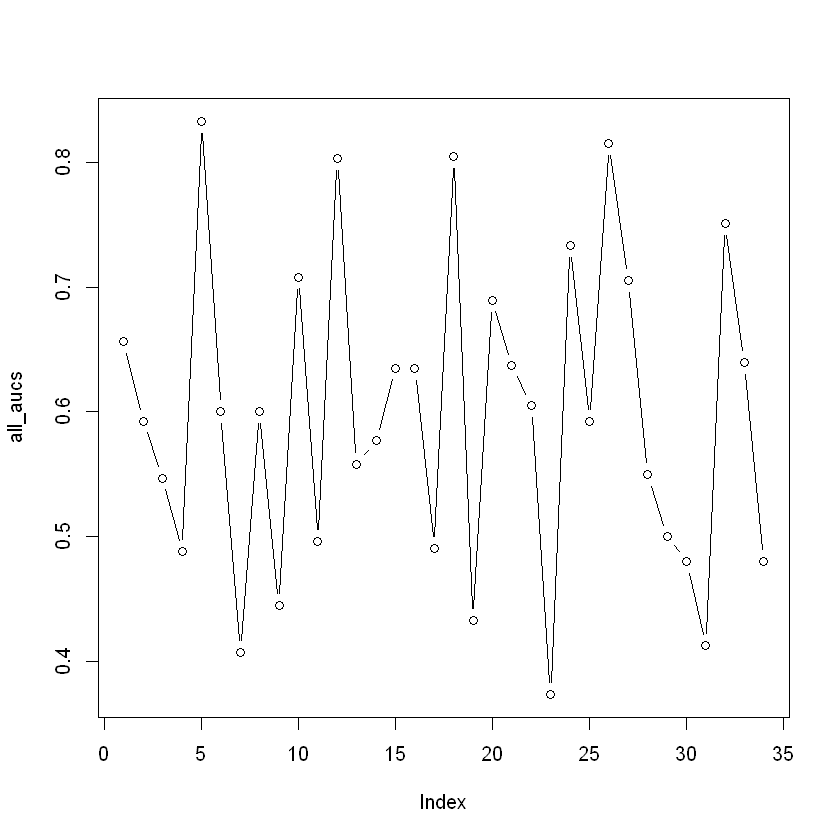

In [22]:
# By setting a new unique seed, you ensure a different
# 'random' split
seeds <- c(123, 246, 91, 949, 9000, 1860, 1853, 1416, 515, 369,145,36920,877,124,617,1743,4852,9001,9005,9004,14,15,19,18,246,47,1,2,3,4,5,6,7,20)  #give 10 random values
all_aucs <- vector(length = length(seeds))

for (i in 1:length(seeds)) {
    set.seed(seeds[i])
    allind <- sample(x = 1:nrow(basetable_train), size = nrow(basetable_train),
        replace = TRUE)  # WITH replacement
    

    # block to get indices
    trainind <- allind[1:round(length(allind) * 0.70)]
    testind <- allind[!allind %in% trainind]  #get all indices which are not in training

    #actual subsetting
    train <- basetable_train[trainind, ]
    yTRAIN <- train$Top10
    train$Top10 = NULL
    train$Top5 = NULL
    train$Top4 = NULL
    train$Top3 = NULL
    
    test <- basetable_train[testind, ]
    yTEST <- test$Top10
    test$Top10 <- NULL
    test$Top5 = NULL
    test$Top4 = NULL
    test$Top3 = NULL
    
    #fit
    model <- ranger(x=train, y = yTRAIN, num.trees = 500, mtry = 10, sample.fraction = 0.75, probability = TRUE)
    # predict on second set (test)0
    predictions =  predict(model,test)$predictions[,2]   
    
    # evaluate and store
    all_aucs[i] <- AUC::auc(roc(predictions, yTEST))
}

# Plot
plot(all_aucs, type = "b")

In [23]:
mean(all_aucs)

[1] 0.596302

## Validation

In [26]:
set.seed(123)
train <- basetable_train
yTRAIN <- train$Top10
train$Top10 = NULL
train$Top5 = NULL
train$Top4 = NULL
train$Top3 = NULL

test <- basetable_val
yTEST <- test$Top10
test$Top10 = NULL
test$Top5 = NULL
test$Top4 = NULL
test$Top3 = NULL

### Random Forest

In [27]:
set.seed(123)
#fit
rFmodel <- randomForest(x=train, y = yTRAIN, ntree = 1000,mtry=15)
# predict on second set (test)
predictions <- predict(rFmodel, test, type = "prob")[, 2]

AUC::auc(roc(predictions,factor(yTEST)))

[1] 0.7483558

In [28]:
auc = AUC::auc(roc(predictions,factor(yTEST)))

In [29]:
res = ifelse(predictions>=0.5,1,0)
true_outcome = yTEST

In [30]:
confusionMatrix(as.factor(res), as.factor(true_outcome))[[2]]
TN =(confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,1]
TP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,2]
FN = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,2]
FP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,1]

accuracy = (TP+TN)/(TP+FP+TN+FN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)

paste("AUC: ", auc)
paste("Accuracy: ", accuracy)
paste("Recall: ", recall)
paste("Precision: ", precision)

          Reference
Prediction   0   1
         0   6   0
         1  25 103

[1] "AUC:  0.748355778264955"

[1] "Accuracy:  0.813432835820896"

[1] "Recall:  1"

[1] "Precision:  0.8046875"

### Ranger

In [31]:
#fit
model <- ranger(x=train, y = yTRAIN, num.trees = 1000, mtry = 8,min.node.size = 13, sample.fraction = 0.75, probability = TRUE, seed = 123)
# predict on second set (test)
predictions =  predict(model,test)$predictions[,2]

AUC::auc(roc(predictions,factor(yTEST)))

[1] 0.764798

In [32]:
auc = AUC::auc(roc(predictions,factor(yTEST)))

In [33]:
res = ifelse(predictions>=0.5,1,0)
true_outcome = yTEST

In [34]:
confusionMatrix(as.factor(res), as.factor(true_outcome))[[2]]
TN =(confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,1]
TP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,2]
FN = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,2]
FP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,1]

accuracy = (TP+TN)/(TP+FP+TN+FN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)

paste("AUC: ", auc)
paste("Accuracy: ", accuracy)
paste("Recall: ", recall)
paste("Precision: ", precision)

          Reference
Prediction   0   1
         0   4   0
         1  27 103

[1] "AUC:  0.764797995615409"

[1] "Accuracy:  0.798507462686567"

[1] "Recall:  1"

[1] "Precision:  0.792307692307692"

# Prediction if finish in the top 5

## Random Forest

## Tuning

In [35]:
# hyperparameter grid search
hyper_grid <- expand.grid(
   num_trees = c(1000),
  mtry       = seq(15, 35, by = 1),
  node_size  = seq(1, 13, by = 2),
  sampe_size = c(.55, .632, .70,0.75,.80),
  OOB_RMSE   = 0
 
)
nrow(hyper_grid)

[1] 735

In [36]:
for(i in 1:nrow(hyper_grid)) {
  
  # train model
  model <- ranger(
    x               = basetable_train[,-(40:43)], 
    y               = basetable_train$Top5, 
    num.trees       = hyper_grid$mtry[i],
    mtry            = hyper_grid$mtry[i],
    min.node.size   = hyper_grid$node_size[i],
    sample.fraction = hyper_grid$sampe_size[i],
    probability     = TRUE,
    seed            = 123
  )
  
  # add OOB error to grid
  hyper_grid$OOB_RMSE[i] <- sqrt(model$prediction.error)
}

In [37]:
hyper_grid %>% 
  dplyr::arrange(OOB_RMSE) %>%
  head(10)


num_trees,mtry,node_size,sampe_size,OOB_RMSE
1000,33,9,0.70,0.4911150
1000,33,13,0.70,0.4916443
1000,33,11,0.70,0.4923125
1000,33,3,0.70,0.4929042
1000,31,13,0.55,0.4931275
1000,29,13,0.55,0.4931403
1000,26,7,0.55,0.4931752
1000,25,9,0.55,0.4937150
1000,33,7,0.70,0.4937157
1000,33,1,0.55,0.4937691


### 5x2cv

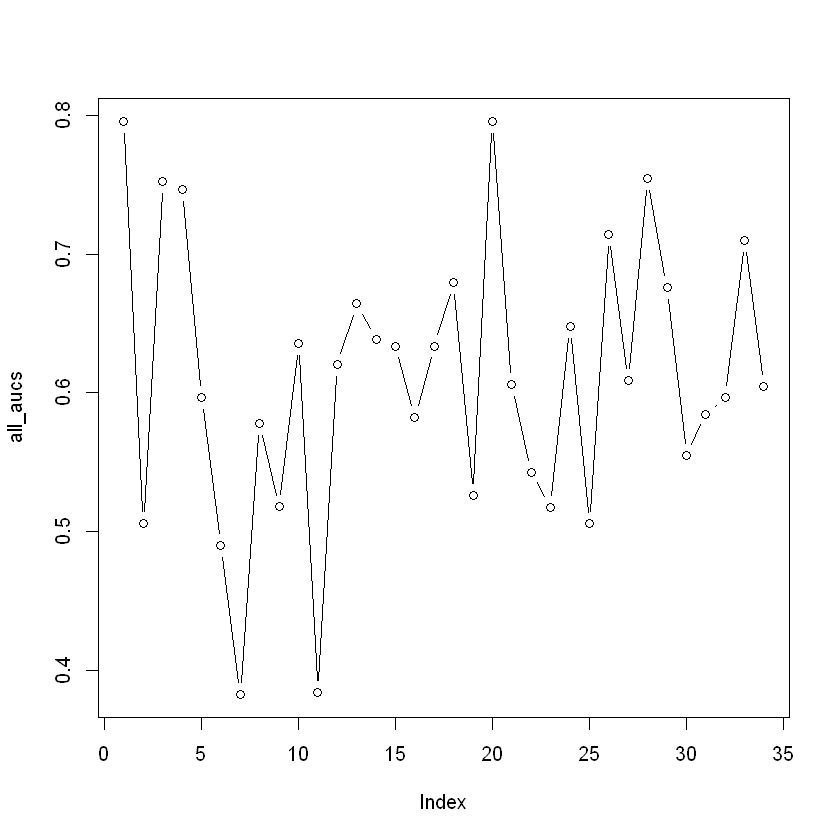

In [40]:
# By setting a new unique seed, you ensure a different
# 'random' split
seeds <- c(123, 246, 91, 949, 9000, 1860, 1853, 1416, 515, 369,145,36920,877,124,617,1743,4852,9001,9005,9004,14,15,19,18,246,47,1,2,3,4,5,6,7,20)  #give 10 random values
all_aucs <- vector(length = length(seeds))

for (i in 1:length(seeds)) {
    set.seed(seeds[i])
    allind <- sample(x = 1:nrow(basetable_train), size = nrow(basetable_train),
        replace = TRUE)  # WITH replacement
    

    # block to get indices
    trainind <- allind[1:round(length(allind) * 0.70)]
    testind <- allind[!allind %in% trainind]  #get all indices which are not in training

    #actual subsetting
    train <- basetable_train[trainind, ]
    yTRAIN <- train$Top5
    train$Top10 = NULL
    train$Top5 = NULL
    train$Top4 = NULL
    train$Top3 = NULL
    train$Top2 = NULL
    
    test <- basetable_train[testind, ]
    yTEST <- test$Top5
    test$Top5 <- NULL
    test$Top5 = NULL
    test$Top4 = NULL
    test$Top3 = NULL
    test$Top2 = NULL
    
    #fit
    model <- ranger(x=train, y = yTRAIN, num.trees = 500, mtry = 10, sample.fraction = 0.75, probability = TRUE)
    # predict on second set (test)0
    predictions =  predict(model,test)$predictions[,2]   
    
    # evaluate and store
    all_aucs[i] <- AUC::auc(roc(predictions, yTEST))
}

# Plot
plot(all_aucs, type = "b")

In [41]:
mean(all_aucs)

[1] 0.6112681

## Validation

In [42]:
set.seed(123)
train <- basetable_train
yTRAIN <- train$Top5
train$Top10 = NULL
train$Top5 = NULL
train$Top4 = NULL
train$Top3 = NULL
train$Top2 = NULL

test <- basetable_val
yTEST <- test$Top5
test$Top10 = NULL
test$Top5 = NULL
test$Top4 = NULL
test$Top3 = NULL
test$Top2 = NULL

### Random Forest

In [43]:
set.seed(123)
#fit
rFmodel <- randomForest(x=train, y = yTRAIN, ntree = 1000,mtry=15)
# predict on second set (test)
predictions <- predict(rFmodel, test, type = "prob")[, 2]

AUC::auc(roc(predictions,factor(yTEST)))

[1] 0.6769594

In [44]:
auc = AUC::auc(roc(predictions,factor(yTEST)))

In [45]:
res = ifelse(predictions>=0.5,1,0)
true_outcome = yTEST

In [46]:
confusionMatrix(as.factor(res), as.factor(true_outcome))[[2]]
TN =(confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,1]
TP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,2]
FN = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,2]
FP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,1]

accuracy = (TP+TN)/(TP+FP+TN+FN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)

paste("AUC: ", auc)
paste("Accuracy: ", accuracy)
paste("Recall: ", recall)
paste("Precision: ", precision)

          Reference
Prediction  0  1
         0 23 10
         1 50 51

[1] "AUC:  0.676959353245003"

[1] "Accuracy:  0.552238805970149"

[1] "Recall:  0.836065573770492"

[1] "Precision:  0.504950495049505"

### Ranger

In [47]:
#fit on training set
model <- ranger(x=train, y = yTRAIN, num.trees = 1000, mtry = 8,min.node.size = 13, sample.fraction = 0.75, probability = TRUE, seed = 123)
# predict on validation set
predictions =  predict(model,test)$predictions[,2]

AUC::auc(roc(predictions,factor(yTEST)))

[1] 0.6889737

In [48]:
auc = AUC::auc(roc(predictions,factor(yTEST)))

In [49]:
res = ifelse(predictions>=0.5,1,0)
true_outcome = yTEST

In [50]:
confusionMatrix(as.factor(res), as.factor(true_outcome))[[2]]
TN =(confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,1]
TP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,2]
FN = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,2]
FP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,1]

accuracy = (TP+TN)/(TP+FP+TN+FN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)

paste("AUC: ", auc)
paste("Accuracy: ", accuracy)
paste("Recall: ", recall)
paste("Precision: ", precision)

          Reference
Prediction  0  1
         0 22 10
         1 51 51

[1] "AUC:  0.688973725578262"

[1] "Accuracy:  0.544776119402985"

[1] "Recall:  0.836065573770492"

[1] "Precision:  0.5"

### Test

In [ ]:
#TEST 
test <- basetable_test
yTEST <- test$Top5
test$Top10 = NULL
test$Top5 = NULL
test$Top4 = NULL
test$Top3 = NULL
test$Top2 = NULL

In [ ]:
# predict on second set (test)
predictions =  predict(model,test)$predictions[,2]

AUC::auc(roc(predictions,factor(yTEST)))

auc = AUC::auc(roc(predictions,factor(yTEST)))

In [ ]:
res = ifelse(predictions>=0.5,1,0)
true_outcome = yTEST

confusionMatrix(as.factor(res), as.factor(true_outcome))[[2]]
TN =(confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,1]
TP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,2]
FN = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,2]
FP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,1]

accuracy = (TP+TN)/(TP+FP+TN+FN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)

paste("AUC: ", auc)
paste("Accuracy: ", accuracy)
paste("Recall: ", recall)
paste("Precision: ", precision)

# XGBoost

## Feature selection: Variable Importance from Machine Learning Algorithms

In [ ]:
#Preparing the train and validation tables
table_train5 <- table_train
table_val5 <- table_val
table_test5 <- table_test
table_trainBIG5 <- table_trainBIG
table_train5$Top10 <- NULL
table_train5$Top4 <- NULL
table_train5$Top3 <- NULL
table_train5$Top2 <- NULL
table_val5$Top10 <- NULL
table_val5$Top4 <- NULL
table_val5$Top3 <- NULL
table_val5$Top2 <- NULL
table_test5$Top10 <- NULL
table_test5$Top4 <- NULL
table_test5$Top3 <- NULL
table_test5$Top2 <- NULL

In [ ]:
# Train an rpart model and compute variable importance.
library(caret)
set.seed(100)
rPartMod <- train(Top5 ~ ., data=table_train5, method="treebag")
rpartImp <- varImp(rPartMod)
print(rpartImp)
plot(rpartImp, top = 20, main='Variable Importance')
selected <- c("cobbles_mean", "acceleration_max", "prologue_mean", "sprint_mean", "tt_max", "downhill_max")


In [ ]:
#new train en val set
y_train <- table_train5$Top5
train <- table_train5
train$Top5<- NULL

y_val <- table_val5$Top5
val <- table_val5
val$Top5 <-NULL

y_test <- table_test5$Top5
test <- table_test
table_test5$Top5 <- NULL


train_fs <- train[selected]
val_fs <- val[selected]
test_fs <- test[selected]

## Training the model

In [ ]:
#preparing matrices
#convert all data to numeric format
trainxgb <- train_fs %>% mutate_if(is.factor, as.character)  %>% mutate_if(is.character, as.numeric)
testxgb <- test_fs %>% mutate_if(is.factor, as.character)  %>% mutate_if(is.character, as.numeric)
valxgb <- val_fs %>% mutate_if(is.factor, as.character)  %>% mutate_if(is.character, as.numeric)

dtrain <- xgb.DMatrix(data = as.matrix(trainxgb),
                      label = as.numeric(as.character(y_train))) 
dval <- xgb.DMatrix(data = as.matrix(valxgb), 
                    label = as.numeric(as.character(y_val))) 
dtest <- xgb.DMatrix(data = as.matrix(testxgb))

In [ ]:
#plotting learning curve of the number of iterations
#Need to have watchlist and verbose turned on
watchlist <- list(train=dtrain, test=dval)
xgbModel_opt <- xgb.train(data = dtrain, 
                          nrounds = 20,
                          eta= 0.1,
                          objective = "binary:logistic", 
                          verbose = 2, 
                          watchlist = watchlist,
                          eval_metric = 'auc')

history <- xgbModel_opt$evaluation_log

history %>% pivot_longer(2:3, names_to = "set", values_to = "performance") %>% 
  ggplot(., aes(iter, performance, col = set))+
  geom_point()+ geom_line()+
  facet_wrap(~set)

## Validation

In [ ]:
##Optimize nrounds BEST
opt_iter <- history$iter[which.max(history$test_auc)]

xgbModel_opt <- xgb.train(data = dtrain, 
                          nrounds = opt_iter, 
                          objective = "binary:logistic",
                    
                          eta = 0.1,
                          verbose = 2, 
                          eval_metric = 'auc')

#Validation
predxgb <- predict(xgbModel_opt,dval)
auc <-AUC::auc(roc(predxgb,y_val))

In [ ]:
res <-ifelse(predxgb>=0.5,1,0)
true_outcome <- y_val


confusionMatrix(as.factor(res), as.factor(true_outcome))[[2]]
TN =(confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,1]
TP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,2]
FN = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,2]
FP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,1]

accuracy = (TP+TN)/(TP+FP+TN+FN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)

paste("AUC: ", auc)
paste("Accuracy: ", accuracy)
paste("Recall: ", recall)
paste("Precision: ", precision)


## Test

In [ ]:
predxgb <- predict(xgbModel_opt,dtest)
auc <-AUC::auc(roc(predxgb,y_test))
res <-ifelse(predxgb>=0.5,1,0)
true_outcome <- y_test

In [ ]:
confusionMatrix(as.factor(res), as.factor(true_outcome))[[2]]
TN =(confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,1]
TP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,2]
FN = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,2]
FP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,1]

accuracy = (TP+TN)/(TP+FP+TN+FN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)

paste("AUC: ", auc)
paste("Accuracy: ", accuracy)
paste("Recall: ", recall)
paste("Precision: ", precision)


# Normal AdaBoost

## Feature selection

In [ ]:
p_load(ada)
#Prepating the train and validation tables
table_train5 <- table_train
table_val5 <- table_val
table_test5 <- table_test
table_train5$Top10 <- NULL
table_train5$Top4 <- NULL
table_train5$Top3 <- NULL
table_train5$Top2 <- NULL
table_val5$Top10 <- NULL
table_val5$Top4 <- NULL
table_val5$Top3 <- NULL
table_val5$Top2 <- NULL
table_test5$Top10 <- NULL
table_test5$Top4 <- NULL
table_test5$Top3 <- NULL
table_test5$Top2 <- NULL

In [ ]:
# Train an rpart model and compute variable importance.
library(caret)
set.seed(100)
rPartMod <- train(Top5 ~ ., data=table_train5, method="treebag")
rpartImp <- varImp(rPartMod)
print(rpartImp)
plot(rpartImp, top = 20, main='Variable Importance')
selected <- c("cobbles_mean", "acceleration_max", "prologue_mean", "sprint_mean", "tt_max", "downhill_max")


In [ ]:
#new train en val set
y_train <- table_train5$Top5
train <- table_train5
train$Top5<- NULL

y_val <- table_val5$Top5
val <- table_val5
val$Top5 <-NULL

y_test <- table_test5$Top5
test <- table_test
table_test5$Top5 <- NULL


train_fs <- train[selected]
val_fs <- val[selected]
test_fs <- test[selected]

## Training the model

In [ ]:
#preparing matrices
#convert all data to numeric format
trainxgb <- train_fs %>% mutate_if(is.factor, as.character)  %>% mutate_if(is.character, as.numeric)
testxgb <- test_fs %>% mutate_if(is.factor, as.character)  %>% mutate_if(is.character, as.numeric)
valxgb <- val_fs %>% mutate_if(is.factor, as.character)  %>% mutate_if(is.character, as.numeric)

dtrain <- xgb.DMatrix(data = as.matrix(trainxgb),
                      label = as.numeric(as.character(y_train))) 
dval <- xgb.DMatrix(data = as.matrix(valxgb), 
                    label = as.numeric(as.character(y_val))) 
dtest <- xgb.DMatrix(data = as.matrix(testxgb))

In [ ]:
watchlist <- list(train=dtrain, test=dval)
adaModel_opt <- xgb.train(data = dtrain, 
                          nrounds = 20, 
                          eta=0.1,
                          objective = "binary:logistic", 
                          verbose = 2, 
                          watchlist = watchlist,
                          eval_metric = 'auc')

history <- adaModel_opt$evaluation_log

history %>% pivot_longer(2:3,names_to = "set", values_to = "performance") %>% 
  ggplot(., aes(iter, performance, col = set))+
  geom_point() + geom_line() + 
  facet_wrap(~set, )


In [ ]:
opt_iter <- history$iter[which.max(history$test_auc)]
adaModel_opt <- xgb.train(data = dtrain, 
                          nrounds = opt_iter, 
                          eta=0.1,
                          objective = "binary:logistic", 
                          verbose = 2, 
                          eval_metric = 'auc')

ABmodel <- ada(y_train ~ . ,train_fs,iter=opt_iter)

## Validation

In [ ]:
predAB <- as.numeric(predict(ABmodel,val_fs,type="probs")[,2])
AUC::auc(roc(predAB,y_val))

## Test

In [ ]:
predAB <- as.numeric(predict(ABmodel,test_fs,type="probs")[,2])
auc <-AUC::auc(roc(predAB,y_test))

In [ ]:
res <-ifelse(predAB>=0.5,1,0)
true_outcome <- y_test


confusionMatrix(as.factor(res), as.factor(true_outcome))[[2]]
TN =(confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,1]
TP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,2]
FN = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,2]
FP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,1]

accuracy = (TP+TN)/(TP+FP+TN+FN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)

paste("AUC: ", auc)
paste("Accuracy: ", accuracy)
paste("Recall: ", recall)
paste("Precision: ", precision)


## Light GBM

### Feature Selection : boruta

In [ ]:
table_train5 <- table_train
table_val5 <- table_val
table_test5 <- table_test
table_train5$Top10 <- NULL
table_train5$Top4 <- NULL
table_train5$Top3 <- NULL
table_train5$Top2 <- NULL
table_val5$Top10 <- NULL
table_val5$Top4 <- NULL
table_val5$Top3 <- NULL
table_val5$Top2 <- NULL
table_test5$Top10 <- NULL
table_test5$Top4 <- NULL
table_test5$Top3 <- NULL
table_test5$Top2 <- NULL

In [ ]:
#Variable selection: Boruta
rf_boruta <- Boruta(table_train5[, !names(table_train5) %in% c("Top5")], table_train5$Top5, doTrace = 0)

varsel_boruta <- names(rf_boruta$finalDecision[rf_boruta$finalDecision ==
                                                 "Confirmed"])


In [ ]:
#new train en val set
y_train <- table_train5$Top5
train <- table_train5
train$Top5<- NULL

y_val <- table_val5$Top5
val <- table_val5
val$Top5 <-NULL

y_test <- table_test5$Top5
test <- table_test
table_test5$Top5 <- NULL


train_fs <- train[varsel_boruta]
val_fs <- val[varsel_boruta]
test_fs <- test[varsel_boruta]


### Training the model

In [ ]:
p_load(lightgbm)
leaves <- c(2, 4, 6, 8)
nround <- c(2, 5, 10, 20, 50, 100, 200)
learning_rate <- c(0.01, 0.05, 0.1, 0.2, 0.5)

# create data frame of all possible combinations
params <- expand.grid(leaves, nround, learning_rate)
colnames(params) <- c("leaves", "nround", "learning_rate")

aucs <- vector()
for (row in 1:nrow(params)) {
  # set parameters
  par <- params[row, ]
  param_set <- list(num_leaves = par[, "leaves"], learning_rate = par[,
                                                                      "learning_rate"], objective = "binary", boosting = "gbdt",
                    num_iterations = par[, "nround"])
  # model
  lgbm_model <- lightgbm(data = as.matrix(train_fs),
                         params = param_set, label = as.numeric(as.character(y_train)),
                         verbose = -1)
  
  # predict
  pred <- predict(lgbm_model, as.matrix(val_fs))
  
  # evaluate
  aucs[row] <- AUC::auc(AUC::roc(pred, y_val))
}

(optimal_paramsLGBM <- params[which.max(aucs), ])

### Optimal model

In [ ]:
# Build the final model on the optimal parameters
final_param_set <- list(num_leaves = optimal_paramsLGBM[, "leaves"],
                        learning_rate = optimal_paramsLGBM[, "learning_rate"], objective = "binary",
                        boosting = "gbdt", num_iterations = optimal_paramsLGBM[,
                                                                               "nround"])

lgbm_model <- lightgbm(data = as.matrix(train_fs), params = final_param_set,
                       label = as.numeric(as.character(y_train)), verbose = -1)

### Validation

In [ ]:
# Predict
predlgbm <- predict(lgbm_model, as.matrix(val_fs))
# Evaluate
AUC::auc(AUC::roc(predlgbm, y_val))

### Test

In [ ]:
predlgbm <- predict(lgbm_model, as.matrix(test_fs))
auc <-AUC::auc(AUC::roc(predlgbm, y_test))

In [ ]:
res <-ifelse(predlgbm>=0.5,1,0)
true_outcome <- y_test


confusionMatrix(as.factor(res), as.factor(true_outcome))[[2]]
TN =(confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,1]
TP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,2]
FN = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,2]
FP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,1]

accuracy = (TP+TN)/(TP+FP+TN+FN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)

paste("Accuracy: ", accuracy)
paste("Recall: ", recall)
paste("Precision: ", precision)


# Rotation Forest

In [ ]:
vector <- seq(10, 200, by=10)
AUC_stored <- vector()
for (i in vector){
  RoF_train <- rotationForest(x = basetable_train[,-(40:44)], y = basetable_train$Top5, L=i)
  pred_RoF_train <- predict(RoF_train, basetable_val[,-(40:44)])
  
  AUC_stored[match(i,vector)] <- AUC::auc(AUC::roc(pred_RoF_train, basetable_val$Top5))
}

plot(vector, AUC_stored)
max(AUC_stored) # Val AUC
best_L = vector[which.max(AUC_stored)] # extract best L

RoF_test <- rotationForest(x = basetable[,-(40:44)], y = basetable$Top5, L=best_L)
pred_RoF_test <- predict(RoF_test, basetable_test[,-(40:44)])

AUC::auc(AUC::roc(pred_RoF_test, basetable_test$Top5)) # Test AUC



In [ ]:
# check accuracy
res <-ifelse(pred_RoF_test>=0.5,1,0)
true_outcome <- basetable_test$Top5


confusionMatrix(as.factor(res), as.factor(true_outcome))[[2]]
TN =(confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,1]
TP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,2]
FN = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,2]
FP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,1]

accuracy = (TP+TN)/(TP+FP+TN+FN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)
accuracy

# Catboost

In [ ]:
train_pool <- catboost.load_pool(data = data.matrix(basetable_train[,-(40:44)]), 
                                 label = as.numeric(as.character(basetable_train$Top5)))
val_pool <- catboost.load_pool(data = data.matrix(basetable_val[,-(40:44)]), 
                                label = as.numeric(as.character(basetable_val$Top5)))

In [ ]:
# parameter tuning with caret
fit_control <- trainControl(method = "cv",
                            number = 4,
                            classProbs = TRUE)

grid <- expand.grid(depth = c(4, 6, 8),
                    learning_rate = c(0.1,0.5,1),
                    iterations = 100,
                    l2_leaf_reg = c(0.001, 0.01, 0.1, 1),
                    rsm = 0.95,
                    border_count = 64)
report <- train(basetable_train[,-(40:44)], as.factor(make.names(basetable_train$Top5)),
                method = catboost.caret,
                logging_level = 'Verbose', preProc = NULL,
                tuneGrid = grid, trControl = fit_control)

print(report)
#extract best parameters
params <- list(loss_function = 'Logloss',
               iterations = 100, 
               depth = 8, 
               learning_rate = 0.1,
               l2_leaf_reg = 0.1, #L2 regularization 
               metric_period=10)

importance <- varImp(report, scale = FALSE)
print(importance)

# better performance with default parameters?
# params = list(loss_function = 'Logloss',
#               iterations = 100, 
#               depth = 6, 
#               learning_rate = 0.03,
#               l2_leaf_reg = 3, #L2 regularization term for the leaf nodes (also in xgboost)
#               metric_period=10)

In [ ]:
# train model
catboost_train <- catboost.train(train_pool,  NULL, params = params)

preds_cad_train <- catboost.predict(catboost_train, val_pool)

AUC::auc(AUC::roc(preds_cad_train,basetable_val$Top5)) # Validation set AUC

In [ ]:
# now for test set
big_pool <- catboost.load_pool(data = data.matrix(basetable[,-(40:44)]), 
                                 label = as.numeric(as.character(basetable$Top5)))
test_pool <- catboost.load_pool(data = data.matrix(basetable_test[,-(40:44)]), 
                               label = as.numeric(as.character(basetable_test$Top5)))

catboost_test <- catboost.train(big_pool,  NULL, params = params)

preds_cad_test <- catboost.predict(catboost_test, test_pool)

AUC::auc(AUC::roc(preds_cad_test,basetable_test$Top5)) # Test set AUC

In [ ]:
# check accuracy
res <-ifelse(preds_cad_test>=0.5,1,0)
true_outcome <- basetable_test$Top5


confusionMatrix(as.factor(res), as.factor(true_outcome))[[2]]
TN =(confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,1]
TP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,2]
FN = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,2]
FP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,1]

accuracy = (TP+TN)/(TP+FP+TN+FN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)
accuracy

# Heterogenous ensemble


In [ ]:
## Heterogenous ensemble

finalpredictions <- (auc_RoF/(auc_RoF + auc_cat)) * pred_RoF_test + (auc_cat/(auc_RoF + auc_cat)) * preds_cad_test

AUC::auc(AUC::roc(finalpredictions, basetable_test$Top5))

In [ ]:
# accuracy
res <-ifelse(finalpredictions>=0.5,1,0)
true_outcome <- basetable_test$Top5


confusionMatrix(as.factor(res), as.factor(true_outcome))[[2]]
TN =(confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,1]
TP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,2]
FN = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,2]
FP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,1]

accuracy = (TP+TN)/(TP+FP+TN+FN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)
accuracy